In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
#Given data
ro = 0.019
l = 0.14
#brass
rho_b = 8522          #kg/m3
cp_b = 385            #J/Kg K
k_b = 110.7           #W/m K
alpha_b = k_b/(rho_b*cp_b)
A = 2*np.pi*ro*l
V = np.pi*(ro**2)*l


In [5]:
#For Brass @ 67 degrees with agitator

t_b1 = np.linspace(0,150,16)
T_brass_1 = np.array([22.7,33,48.8,58,62.5,64,64.7,65.2,65.5,65.7,65.8,66,66,66,66,66])
Ti_b1 = T_brass_1[0]
T_inf_b1 = 67
F_b1 = (alpha_b*t_b1)/(V/A)**2                          #Fourier number
Te_b1 = (T_brass_1 - T_inf_b1) / (Ti_b1 - T_inf_b1)     #Te
Bi_b1 = np.log(Te_b1[1:])/(-1*F_b1[1:])
h_b1 = 2*k_b*Bi_b1/ro
Qi_b1 = h_b1*A*(T_inf_b1 - Ti_b1)*np.exp(-1*Bi_b1*F_b1[1:])

In [6]:
br_67_a = pd.DataFrame({'Time (t)': t_b1[1:],
                   'Te': Te_b1[1:],
                  'Fo': F_b1[1:],
                  'Bi':Bi_b1,
                  'h':h_b1,
                  'Qi':Qi_b1})
print(br_67_a)

    Time (t)        Te         Fo        Bi            h          Qi
0       10.0  0.767494   3.738507  0.070783   824.812710  468.700878
1       20.0  0.410835   7.477013  0.118973  1386.349149  421.701857
2       30.0  0.203160  11.215520  0.142103  1655.875040  249.075823
3       40.0  0.101580  14.954026  0.152929  1782.027618  134.025813
4       50.0  0.067720  18.692533  0.144035  1678.382677   84.153803
5       60.0  0.051919  22.431040  0.131874  1536.681549   59.070850
6       70.0  0.040632  26.169546  0.122402  1426.302393   42.908726
7       80.0  0.033860  29.908053  0.113198  1319.049842   33.068460
8       90.0  0.029345  33.646559  0.104873  1222.048092   26.551750
9      100.0  0.027088  37.385066  0.096527  1124.791967   22.558746
10     110.0  0.022573  41.123573  0.092185  1074.200150   17.953400
11     120.0  0.022573  44.862079  0.084503   984.683471   16.457284
12     130.0  0.022573  48.600586  0.078003   908.938588   15.191339
13     140.0  0.022573  52.339092 

In [8]:
#For Brass @ 67 degrees WITHOUT agitator
t_b2 = np.linspace(0,240,25)
T_brass_2 = np.array([22.8,28.5,37.2,44.3,48.8,52.5,55.1,57.5,59.2,60.4,61.3,62.2,62.9,63.4,63.8,64.2,64.6,64.8,65,
                     65.1,65.2,65.4,65.5,65.5,65.5])
Ti_b2 = T_brass_2[0]
T_inf_b2 = 67
F_b2 = (alpha_b*t_b2)/(V/A)**2                     #Fourier number
Te_b2 = (T_brass_2 - T_inf_b2) / (Ti_b2 - T_inf_b2)
Bi_b2 = np.log(Te_b2[1:])/(-1*F_b2[1:])             #Biot number
h_b2 = 2*k_b*Bi_b2/ro
Qi_b2 = h_b2*A*(T_inf_b2 - Ti_b2)*np.exp(-1*Bi_b2*F_b2[1:])

In [9]:
br_67_w = pd.DataFrame({'Time (t)': t_b2[1:],
                   'Te': Te_b2[1:],
                  'Fo': F_b2[1:],
                  'Bi':Bi_b2,
                  'h':h_b2,
                  'Qi':Qi_b2})
print(br_67_w)

    Time (t)        Te         Fo        Bi           h          Qi
0       10.0  0.871041   3.738507  0.036931  430.342591  276.908677
1       20.0  0.674208   7.477013  0.052724  614.370780  305.990766
2       30.0  0.513575  11.215520  0.059414  692.330463  262.664151
3       40.0  0.411765  14.954026  0.059335  691.413601  210.315273
4       50.0  0.328054  18.692533  0.059627  694.809267  168.381785
5       60.0  0.269231  22.431040  0.058499  681.663661  135.574687
6       70.0  0.214932  26.169546  0.058749  684.579706  108.694891
7       80.0  0.176471  29.908053  0.057998  675.826915   88.103182
8       90.0  0.149321  33.646559  0.056519  658.589977   72.647481
9      100.0  0.128959  37.385066  0.054788  638.426131   60.820084
10     110.0  0.108597  41.123573  0.053986  629.082279   50.467314
11     120.0  0.092760  44.862079  0.053001  617.601843   42.320807
12     130.0  0.081448  48.600586  0.051600  601.275962   36.177441
13     140.0  0.072398  52.339092  0.050165  584

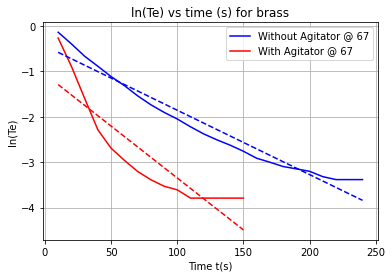

In [22]:
#graph for brass
plt.plot(t_b2[1:],np.log(Te_b2[1:]),label="Without Agitator @ 67",color="blue")
plt.plot(t_b1[1:],np.log(Te_b1[1:]),label="With Agitator @ 67",color="red")
plt.title("ln(Te) vs time (s) for brass")
plt.xlabel("Time t(s)")
plt.ylabel("ln(Te)")
plt.grid()
plt.legend()

slope1, intercept1 = np.polyfit(t_b1[1:],np.log(Te_b1[1:]), 1)
plt.plot(t_b1[1:], t_b1[1:]*slope1 + intercept1, '--',color="red")

slope2, intercept2 = np.polyfit(t_b2[1:],np.log(Te_b2[1:]), 1)
plt.plot(t_b2[1:], t_b2[1:]*slope2 + intercept2, '--',color="blue")

plt.show()

$$ Slope = -\frac{h A}{\rho C_{P} V}$$

Please note that the graph does not contain the data point at t=0 as ln(0) is a math error !

In [24]:
h1_b = -1*slope1*rho_b*cp_b*V/A      #without agitator
h2_b = -1*slope2*rho_b*cp_b*V/A

Bi_1 = h1_b*V/(A*k_b)
Bi_2 = h2_b*V/(A*k_b)

hb_avg = (h1_b + h2_b)/3
print("The avg heat transfer coefficient for brass is {} W/m2 C ".format(hb_avg))
print("The heat transfer coefficients for 67 and 67 (no agitator) are {},{} resp.".format(h1_b,h2_b))
print("The biot numbers for 67 and 67 (no agitator) are {}, {} resp.".format(Bi_1,Bi_2))

The avg heat transfer coefficient for brass is 384.8200272928709 W/m2 C 
The heat transfer coefficients for 67 and 67 (no agitator) are 712.6386841929026,441.8213976857101 resp.
The biot numbers for 67 and 67 (no agitator) are 0.06115688798403408, 0.037916018771583064 resp.


### Inferences from graph:

1. The slope of the case with agitator is greater than without agitator indicating higher heat transfer coefficient in the case with an agitator.
2. The Biot numbers are calculated from the slope obtained from the graph.

### Conclusion:
1. The average heat transfer coefficient obtained is 384.82 W/$m^{2}$ C
2. The heat transfer coefficient is higher in the case where agitator is switched on (712.63 W/$m^{2}$ C)
3. The Biot number for the cases are less than 0.1, making lumped system approach possible.